In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test=y_test.reshape(-1,)

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

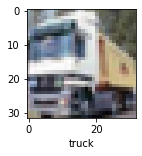

In [10]:
plot_sample(X_train,y_train,1)

In [11]:
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2022-06-29 04:35:58.722431: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [15]:
cnn.fit(X_train,y_train,epochs=20)

2022-06-29 04:36:00.265324: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4640 - accuracy: 0.4765
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1055 - accuracy: 0.6143
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9662 - accuracy: 0.6637
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8848 - accuracy: 0.6922
Epoch 5/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8162 - accuracy: 0.7173
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7568 - accuracy: 0.7391
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7110 - accuracy: 0.7526
Epoch 8/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6650 - accuracy: 0.7688
Epoch 9/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6229 - accuracy: 0.7837
Epoch 10/20
1563/1563 [==============================] - 24s 15m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3202 - accuracy: 0.6903


[1.320162057876587, 0.6902999877929688]

In [17]:
y_pred=cnn.predict(X_test)
y_pred

array([[1.97037098e-05, 6.00938588e-09, 1.57017839e-05, ...,
        2.66477773e-09, 4.16662743e-07, 4.09144789e-08],
       [2.37128859e-07, 3.83227646e-01, 9.04447212e-11, ...,
        1.98221227e-14, 6.16771936e-01, 1.54611001e-07],
       [1.53712026e-04, 6.39125407e-01, 4.77295544e-07, ...,
        5.26634594e-08, 3.60648841e-01, 3.62304854e-05],
       ...,
       [4.01789213e-10, 2.80377968e-14, 8.87953211e-03, ...,
        4.13472881e-05, 2.40805830e-11, 2.42805830e-13],
       [4.95065236e-04, 6.63632682e-06, 1.12958536e-04, ...,
        4.05388185e-08, 4.77424628e-11, 4.12639878e-09],
       [5.64296738e-14, 1.19880755e-12, 8.55031379e-10, ...,
        9.99999881e-01, 1.77294973e-12, 4.77539123e-16]], dtype=float32)

In [18]:
y_classes=[np.argmax(element) for element in y_pred]

In [19]:
y_classes[:5]

[3, 8, 1, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

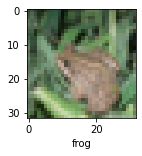

In [21]:
plot_sample(X_test,y_test,4)

In [22]:
classes[y_classes[4]]

'frog'

In [23]:
#It seems that our model is well trained and giving correct result after train and test and predicting the correct result